In [169]:
import numpy as np
import scipy.stats as sps
from src.formula import TwoCNF
from src.graph import Graph
import src.cut_solvers as cs
import src.max2sat_solvers as mss
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

In [180]:
alpha = 0.87856

In [181]:
sizes = np.arange(9) + 6
ps = np.array([0.2, 0.5, 0.8])
n_graphs = 15

graphs = [[
    [Graph.randomGraph(size, p) for _ in range(n_graphs)] 
    for size in sizes] for p in ps]

optimal = [[
    [cs.preciseCut(graph) for graph in g2]
    for g2 in g1] for g1 in graphs]

algo = [[
    [cs.multiLaunch(graph, 1000).mean() for graph in g2]
for g2 in g1] for g1 in graphs]

In [182]:
algo = np.array(algo)
optimal = np.array(optimal)

ratio = algo / optimal

rs = ratio.mean(axis=2)

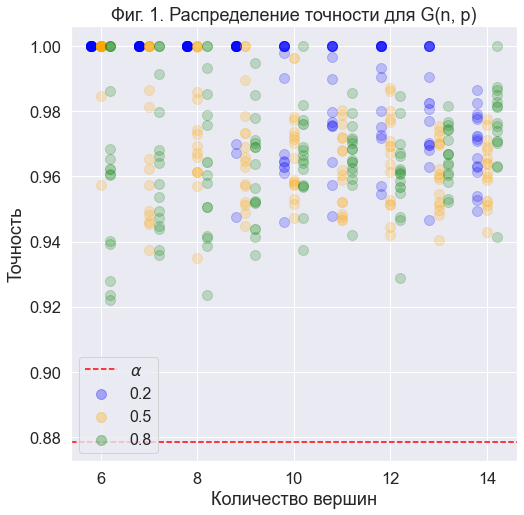

In [183]:
plt.figure(figsize=(8, 8))
colors = ['blue', 'orange', 'green']

sizes = np.arange(9) + 6
ps = np.array([0.2, 0.5, 0.8])

for p, r, c, j in zip(ps, ratio, colors, range(3)):
    for i in range(n_graphs):
        if i == 0:
            plt.scatter(sizes + (j-1)/5, r[:, i], label=p, c=c, alpha=0.3, s=100)
        else: 
            plt.scatter(sizes + (j-1)/5, r[:, i], c=c, alpha=0.2, s=100)
            
plt.axhline(alpha, ls='--', color='red', label='$\\alpha$')
plt.legend(fontsize=16)
plt.xlabel('Количество вершин')
plt.ylabel('Точность')
plt.title('Фиг. 1. Распределение точности для G(n, p)')

plt.show()

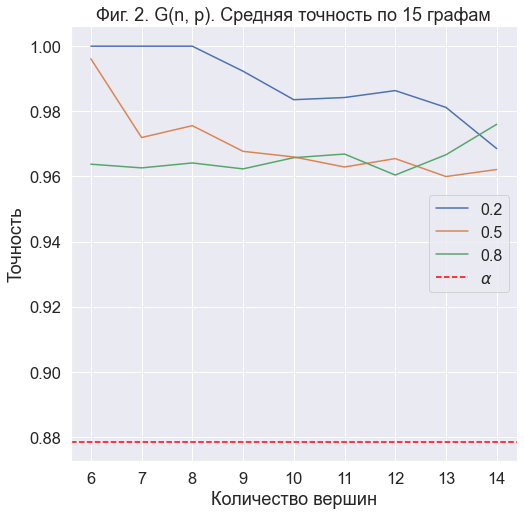

In [184]:
rs = ratio.mean(axis=2)
plt.figure(figsize=(8, 8))

for p, r in zip(ps, rs):
    plt.plot(sizes, r, label=p)

plt.axhline(alpha, ls='--', color='red', label='$\\alpha$')
plt.legend(fontsize=16)
plt.xlabel('Количество вершин')
plt.ylabel('Точность')
plt.title('Фиг. 2. G(n, p). Средняя точность по 15 графам')

plt.show()

In [175]:
sizes = [5, 10, 15, 20, 25]
ps = np.array([0.2, 0.5, 0.8])
n_graphs = 15

graphs_bipartite = [[
    [Graph.randomBiparite(size, size, p) for _ in range(n_graphs)] 
    for size in sizes] for p in ps]

optimal_bip = [[
    [len(graph.edges) for graph in g2]
    for g2 in g1] for g1 in graphs_bipartite]

algo_bip = [[
    [cs.multiLaunch(graph, 1000).mean() for graph in g2]
for g2 in g1] for g1 in graphs_bipartite]

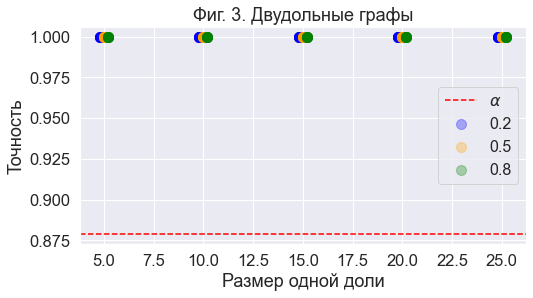

In [176]:
sizes = np.array(sizes)
ratio_bip = np.array(algo_bip) / np.array(optimal_bip)
rs_bip = ratio_bip.mean(axis=2)

plt.figure(figsize=(8, 4))
colors = ['blue', 'orange', 'green']


for p, r, c, j in zip(ps, ratio_bip, colors, range(3)):
    for i in range(n_graphs):
        if i == 0:
            plt.scatter(sizes + (j-1)/5, r[:, i], label=p, c=c, alpha=0.3, s=100)
        else: 
            plt.scatter(sizes + (j-1)/5, r[:, i], c=c, alpha=0.2, s=100)
            

plt.axhline(alpha, ls='--', color='red', label='$\\alpha$')
plt.legend(fontsize=16)
plt.xlabel('Размер одной доли')
plt.ylabel('Точность')
plt.title('Фиг. 3. Двудольные графы')

plt.show()

In [177]:
disjunctions = np.arange(10) + 2
variables = np.arange(5) + 2
n_formulas = 10
formulas = [[[TwoCNF.random_formula(nvar, ndis) for _ in range(n_formulas)] 
             for nvar in variables] for ndis in disjunctions]

optimal = [[
    [mss.preciseSolver(formula) for formula in f2]
    for f2 in f1] for f1 in formulas]

algo = [[
    [mss.multiLaunch(formula, 1000).mean() for formula in f2]
    for f2 in f1] for f1 in formulas]

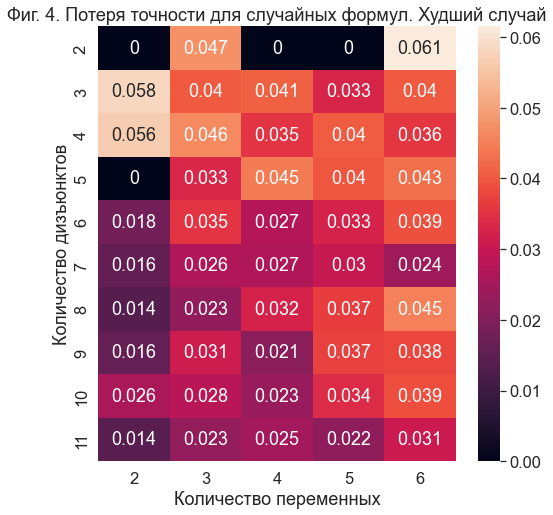

In [159]:
optimal = np.array(optimal)
algo = np.array(algo)

ratio = algo / optimal
plt.figure(figsize=(8, 8))
sns.heatmap(1-ratio.min(axis=2), annot=True,
           xticklabels=variables,
           yticklabels=disjunctions)

plt.title('Фиг. 4. Потеря точности для случайных формул. Худший случай')
plt.xlabel('Количество переменных')
plt.ylabel('Количество дизъюнктов')
plt.show()

In [98]:
disjunctions = np.arange(10) + 2
variables = np.arange(5) + 2
n_formulas = 10
formulas1 = [[[TwoCNF.random_formula_feasible(nvar, ndis) for _ in range(n_formulas)] 
             for nvar in variables] for ndis in disjunctions]

optimal1 = [[
    [len(formula.disjunctions) for formula in f2]
    for f2 in f1] for f1 in formulas1]

algo1 = [[
    [mss.multiLaunch(formula, 1000).mean() for formula in f2]
    for f2 in f1] for f1 in formulas1]

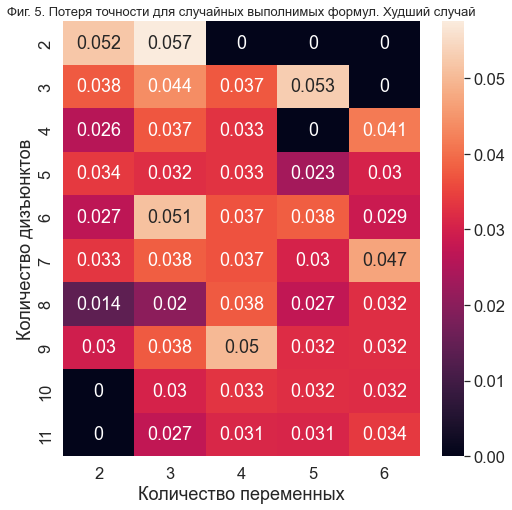

In [166]:
optimal1 = np.array(optimal1)
algo1 = np.array(algo1)

ratio1 = algo1 / optimal1
plt.figure(figsize=(8, 8))
sns.heatmap(1-ratio1.min(axis=2), annot=True,
           xticklabels=variables,
           yticklabels=disjunctions)
plt.title('Фиг. 5. Потеря точности для случайных выполнимых формул. Худший случай', fontsize=13)
plt.xlabel('Количество переменных')
plt.ylabel('Количество дизъюнктов')
plt.show()

In [112]:
formulas2 = [TwoCNF.random_formula_feasible(10, 50) for i in range(100)]
optimal2 = [len(formula.disjunctions) for formula in formulas2]
algo2 = [mss.multiLaunch(formula, 1000).mean() for formula in formulas2]

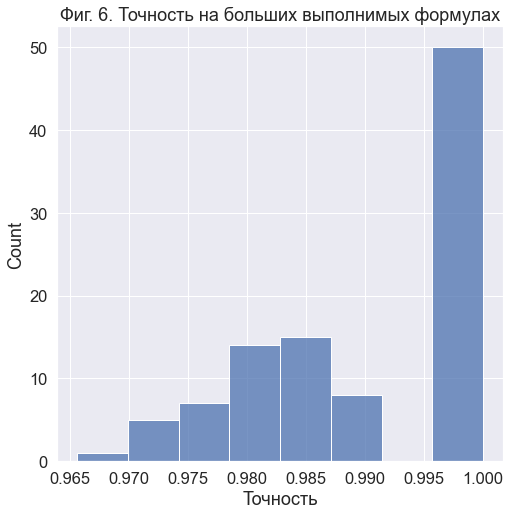

In [167]:
plt.figure(figsize=(8, 8))
ratio2 = np.array(algo2) / np.array(optimal2)
sns.histplot(ratio2)
plt.xlabel('Точность')
plt.title('Фиг. 6. Точность на больших выполнимых формулах')
plt.show()

In [154]:
disjunctions = np.arange(10) + 2
variables = np.arange(5) + 2
n_formulas = 10
formulas3 = [[[TwoCNF.random_formula_same(nvar, ndis) for _ in range(n_formulas)] 
             for nvar in variables] for ndis in disjunctions]

optimal3 = [[
    [mss.preciseSolver(formula) for formula in f2]
    for f2 in f1] for f1 in formulas3]

algo3 = [[
    [mss.multiLaunch(formula, 1000).mean() for formula in f2]
    for f2 in f1] for f1 in formulas3]

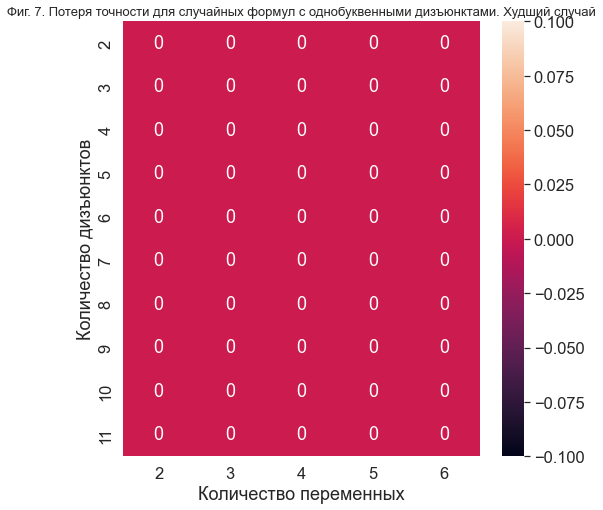

In [168]:
optimal3 = np.array(optimal3)
algo3 = np.array(algo3)

ratio3 = algo3 / optimal3
plt.figure(figsize=(8, 8))
sns.heatmap(1-ratio3.min(axis=2), annot=True,
           xticklabels=variables,
           yticklabels=disjunctions)
plt.title('Фиг. 7. Потеря точности для случайных формул с однобуквенными дизъюнктами. Худший случай', fontsize=13)
plt.xlabel('Количество переменных')
plt.ylabel('Количество дизъюнктов')
plt.show()